# Python Script for NBA Players data
### Alexander Williamson and Brenton Wilder
### Fall Semester 2020

In [26]:
# INSTRUCTIONS FOR GOOGLE COLAB 
# Install this to download basemaps
# You will be prompted to click the RESTART RUNTIME button, please do so before running the second cell
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [1]:
# Import libraries
!pip install wget
!pip install sklearn
!pip install geopy 
!pip install Nominatim
!pip install plotly

import plotly.graph_objects as go
import wget
import pandas as pd
import numpy as np
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap

You should consider upgrading via the 'c:\users\brent\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\brent\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\brent\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\brent\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\brent\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# Load the dataset directly from repository
url = 'https://github.com/bwilder95/NBAplayers/blob/main/Players.csv?raw=true'
df = pd.read_csv(url,sep=',')
print(df.head())

   Unnamed: 0           Player  height  weight  \
0           0  Curly Armstrong   180.0    77.0   
1           1     Cliff Barker   188.0    83.0   
2           2    Leo Barnhorst   193.0    86.0   
3           3       Ed Bartels   196.0    88.0   
4           4      Ralph Beard   178.0    79.0   

                           collage    born   birth_city birth_state  
0               Indiana University  1918.0          NaN         NaN  
1           University of Kentucky  1921.0     Yorktown     Indiana  
2         University of Notre Dame  1924.0          NaN         NaN  
3  North Carolina State University  1925.0          NaN         NaN  
4           University of Kentucky  1927.0  Hardinsburg    Kentucky  


In [3]:
# Confirm shape of dataset is correct (3922 rows and 8 columns)
"""
Column 1 (index 0) is unamed
Column 2 (index 1) is Player
Column 3 (index 2) is collage
Column 4 (index 3) is height
Column 5 (index 4) is weight
Column 6 (index 5) is born
Column 7 (index 6) is birth_city
Column 8 (index 7) is birth_state
"""
df.shape

(3922, 8)

## Task 0: Explore names of NBA players

In [4]:
# Find Kawhi Leonard in our dataframe using a boolean mask
df[df['Player'].str.contains('Kawhi', case=False, na=False)]

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
3491,3491,Kawhi Leonard,201.0,104.0,San Diego State University,1991.0,Los Angeles,California


In [5]:
# Modify pandas column header to fix collage to college. Also, replace blank column with ID.
df.rename(columns={'Unnamed: 0': 'ID', 'collage': 'College'}, inplace=True)

In [6]:
# Find number of NBA players from San Diego State University
df[df['College'].str.contains('San Diego State', case=False, na=False)]


,ID,Player,height,weight,College,born,birth_city,birth_state
1314,1314,Joel Kramer,201.0,92.0,San Diego State University,1955.0,San Diego,California
1376,1376,Steve Malovic,208.0,104.0,San Diego State University,1956.0,Cleveland,Ohio
1657,1657,Michael Cage,206.0,101.0,San Diego State University,1962.0,West Memphis,Arkansas
3077,3077,Randy Holcomb,206.0,102.0,San Diego State University,1979.0,Chicago,Illinois
3491,3491,Kawhi Leonard,201.0,104.0,San Diego State University,1991.0,Los Angeles,California
3517,3517,Malcolm Thomas,206.0,102.0,San Diego State University,1988.0,Columbia,Missouri
3635,3635,Jamaal Franklin,196.0,86.0,San Diego State University,1991.0,Moreno Valley,California


In [7]:
print("Number of NBA players from SDSU = " + str(len(df[df['College'].str.contains('San Diego State', case=False, na=False)])))

Number of NBA players from SDSU = 7


### What is the most common first name for all NBA players? What is the most common last name?

In [8]:
# To do this, we need to first split the Player column into two seperate columns.

df_names = df.copy()
df_names[['First','Last']] = df["Player"].str.split(" ", 1, expand=True)
print(df_names.head())

   ID           Player  height  weight                          College  \
0   0  Curly Armstrong   180.0    77.0               Indiana University   
1   1     Cliff Barker   188.0    83.0           University of Kentucky   
2   2    Leo Barnhorst   193.0    86.0         University of Notre Dame   
3   3       Ed Bartels   196.0    88.0  North Carolina State University   
4   4      Ralph Beard   178.0    79.0           University of Kentucky   

     born   birth_city birth_state  First       Last  
0  1918.0          NaN         NaN  Curly  Armstrong  
1  1921.0     Yorktown     Indiana  Cliff     Barker  
2  1924.0          NaN         NaN    Leo  Barnhorst  
3  1925.0          NaN         NaN     Ed    Bartels  
4  1927.0  Hardinsburg    Kentucky  Ralph      Beard  


### Next let's use mode function to find most frequent name!

In [9]:
print("Most frequent first name =  " + df_names.First.mode())
print("Most frequent last name =  " + df_names.Last.mode())

0    Most frequent first name =  John
dtype: object
0    Most frequent last name =  Williams
dtype: object


### For fun, let's see how many "John" and how many "Williams" we have in our dataset

In [10]:
df[df['Player'].str.match('John ', case=False, na=False)]

,ID,Player,height,weight,College,born,birth_city,birth_state
27,27,John Chaney,190.0,83.0,Louisiana State University,1920.0,NaN,NaN
75,75,John Hargis,188.0,81.0,University of Texas at Austin,1920.0,Nacogdoches,Texas
112,112,John Logan,188.0,79.0,Indiana University,1921.0,Richmond,Indiana
116,116,John Mahnken,203.0,99.0,Georgetown University,1922.0,New Jersey,New Jersey
117,117,John Mandic,193.0,92.0,Oregon State University,1919.0,Los Angeles,California
...,...,...,...,...,...,...,...,...
2891,2891,John Salmons,201.0,95.0,University of Miami,1979.0,Philadelphia,Pennsylvania
2993,2993,John Edwards,213.0,124.0,Kent State University,1981.0,Warren,Ohio
3449,3449,John Wall,193.0,88.0,University of Kentucky,1990.0,Raleigh,North Carolina
3554,3554,John Henson,211.0,103.0,University of North Carolina,1990.0,Greensboro,North Carolina


In [11]:
df[df['Player'].str.contains(' Williams', case=False, na=False)]

,ID,Player,height,weight,College,born,birth_city,birth_state
417,417,Bob Williams,198.0,104.0,Florida Agricultural and Mechanical University,1931.0,NaN,NaN
744,744,Art Williams,185.0,81.0,"California State Polytechnic University, Pomona",1939.0,Bonham,Texas
786,786,Cliff Williams,190.0,81.0,Bowling Green State University,1945.0,NaN,NaN
787,787,Ron Williams,190.0,85.0,West Virginia University,1944.0,Weirton,West Virginia
788,788,Sam Williams,190.0,81.0,University of Iowa,1945.0,NaN,NaN
...,...,...,...,...,...,...,...,...
3527,3527,Derrick Williams,190.0,90.0,University of Illinois at Urbana-Champaign,1984.0,Parkersburg,West Virginia
3528,3528,Elliot Williams,196.0,86.0,University of Memphis,1989.0,Memphis,Tennessee
3529,3529,Jordan Williams,188.0,83.0,New Mexico State University,1951.0,New Haven,Connecticut
3828,3828,Alan Williams,198.0,90.0,Drake University,1948.0,NaN,NaN


## Task 1: Create a word cloud in the shape of the NBA logo (https://www.datacamp.com/community/tutorials/wordcloud-python)

In [12]:
# Use kobe_bryant.png by loading raw image from url.
image_url = "https://s.yimg.com/ny/api/res/1.2/Iavgw3JuaxlaE7B3OBi8BA--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9MTI4MDtoPTk2MA--/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2020-01/e4464340-4223-11ea-b95a-0bddbdd93e38";

img = Image.open(wget.download(image_url));

In [13]:
#Creating dict of college
colleges = df["College"];
colleges = colleges.dropna();
collegelist = dict()
for college in colleges: 
    if college in collegelist:
     collegelist[college] = collegelist[college]+1
    else:
     collegelist[college] = 1

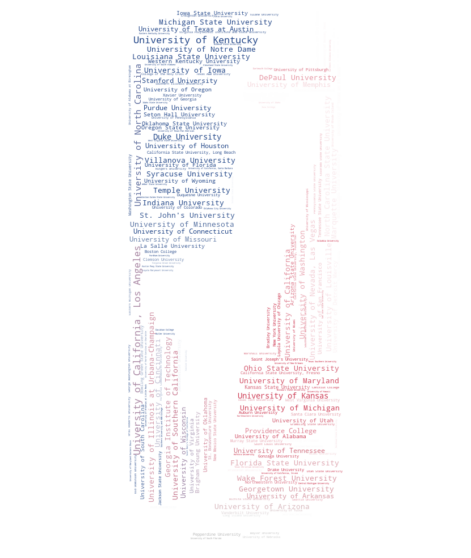

In [14]:
mask = np.array(img);
wordcloud_nba = WordCloud(stopwords=STOPWORDS,background_color= "white", mode = "RGBA", max_words = 10000, mask=mask).generate_from_frequencies(collegelist);

image_colors = ImageColorGenerator(mask);
plt.figure(figsize=[10,10]);
plt.imshow(wordcloud_nba.recolor(color_func=image_colors), interpolation="bilinear");
plt.axis("off");

## Task 2: Use geocoding within geopandas to plot locations to a world map (https://geopandas.org/geocoding.html)

In [21]:
# create states dataframe
mask = (df['birth_state'] == 'Alabama') | (df['birth_state'] == 'Alaska') | (df['birth_state'] == 'Arizona') | (df['birth_state'] == 'Arkansas') | (df['birth_state'] == 'California') | (df['birth_state'] == 'Colorado') | (df['birth_state'] == 'Connecticut') | (df['birth_state'] == 'Delaware') | (df['birth_state'] == 'Florida') | (df['birth_state'] == 'Georgia') | (df['birth_state'] == 'Hawaii') | (df['birth_state'] == 'Idaho') | (df['birth_state'] == 'Illinois') | (df['birth_state'] == 'Indiana') | (df['birth_state'] == 'Iowa') | (df['birth_state'] == 'Kansas') | (df['birth_state'] == 'Kentucky') | (df['birth_state'] == 'Louisiana') | (df['birth_state'] == 'Maine') | (df['birth_state'] == 'Maryland') | (df['birth_state'] == 'Massachusetts') | (df['birth_state'] == 'Michigan') | (df['birth_state'] == 'Minnesota') | (df['birth_state'] == 'Mississippi') | (df['birth_state'] == 'Missouri') | (df['birth_state'] == 'Montana') | (df['birth_state'] == 'Nebraska') | (df['birth_state'] == 'Nevada') | (df['birth_state'] == 'New Hampshire') | (df['birth_state'] == 'New Jersey') | (df['birth_state'] == 'New Mexico') | (df['birth_state'] == 'New York') | (df['birth_state'] == 'North Carolina') | (df['birth_state'] == 'North Dakota') | (df['birth_state'] == 'Ohio') | (df['birth_state'] == 'Oklahoma') | (df['birth_state'] == 'Oregon') | (df['birth_state'] == 'Pennsylvania') | (df['birth_state'] == 'Rhode Island') | (df['birth_state'] == 'South Carolina') | (df['birth_state'] == 'South Dakota') | (df['birth_state'] == 'Tennessee') | (df['birth_state'] == 'Texas') | (df['birth_state'] == 'Utah') | (df['birth_state'] == 'Vermont') | (df['birth_state'] == 'Virginia') | (df['birth_state'] == 'Washington') | (df['birth_state'] == 'West Virginia') | (df['birth_state'] == 'Wisconsin') | (df['birth_state'] == 'Wyoming') 
dfnew = df[mask];

# set a count columns of 1's
dfnew['counts'] = 1;

In [22]:
# Use pivot table via pandas
StateCount = pd.pivot_table(dfnew, index = ['birth_state'], values=['counts'],
                                          aggfunc=[np.sum],)
print(StateCount)

                  sum
               counts
birth_state          
Alabama            75
Alaska              1
Arizona            12
Arkansas           47
California        344
Colorado           16
Connecticut        32
Delaware            6
Florida            96
Georgia           118
Hawaii              2
Idaho               5
Illinois          209
Indiana            94
Iowa               20
Kansas             28
Kentucky           82
Louisiana         101
Maine               1
Maryland           61
Massachusetts      36
Michigan          131
Minnesota          45
Mississippi        77
Missouri           45
Montana             9
Nebraska           11
Nevada              6
New Hampshire       1
New Jersey         95
New Mexico          6
New York          290
North Carolina     96
North Dakota        6
Ohio              137
Oklahoma           30
Oregon             23
Pennsylvania      163
Rhode Island        7
South Carolina     36
South Dakota        5
Tennessee          72
Texas     

In [24]:
# Heat map of states
dp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
dpnew = dp[['code','state','category']];
dpnew = dpnew.drop(index = 44 );
count = StateCount.values;
dpnew['Number of NBA Players'] = count;
#Create Chloropleth
fig = go.Figure(data=go.Choropleth(
    locations=dpnew['code'], # Spatial coordinates
    z = dpnew['Number of NBA Players'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
     colorbar_title = "Players",
))

fig.update_layout(
    title_text = 'Number of NBA Players by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


## Task 3: California had the highest amount of NBA players. Let's map this with respect to city!

In [18]:
Cal = df[df['birth_state'].str.match('California', case=False, na=False)]
Cal

,ID,Player,height,weight,College,born,birth_city,birth_state
22,22,Bill Calhoun,190.0,81.0,City College of San Francisco,1927.0,San Francisco,California
50,50,Bob Feerick,190.0,86.0,Santa Clara University,1920.0,San Francisco,California
74,74,Alex Hannum*,201.0,95.0,University of Southern California,1923.0,Los Angeles,California
117,117,John Mandic,193.0,92.0,Oregon State University,1919.0,Los Angeles,California
130,130,Vern Mikkelsen*,201.0,104.0,Hamline University,1928.0,Fresno,California
...,...,...,...,...,...,...,...,...
3845,3845,Marquese Chriss,208.0,105.0,University of Washington,1997.0,Sacramento,California
3861,3861,Jonathan Gibson,188.0,83.0,New Mexico State University,1987.0,West Covina,California
3890,3890,David Nwaba,193.0,94.0,"California Polytechnic State University, San L...",1993.0,Los Angeles,California
3894,3894,Gary Payton,193.0,81.0,Oregon State University,1968.0,Oakland,California


In [19]:
# Note: this cell takes a very long time to run !! (aprox ~ 20 minutes)
# This is geocoding each of the 344 rows of city data.
Cal['Location'] = Cal['birth_city']
geolocator = Nominatim(user_agent="SDSU")
Cal['Lat'] = Cal['Location'].apply(lambda x: geolocator.geocode(x).latitude)
Cal['Lon'] = Cal['Location'].apply(lambda x: geolocator.geocode(x).longitude)
Cal.head()

,ID,Player,height,weight,College,born,birth_city,birth_state,Location,Lat,Lon
22,22,Bill Calhoun,190.0,81.0,City College of San Francisco,1927.0,San Francisco,California,San Francisco,37.779026,-122.419906
50,50,Bob Feerick,190.0,86.0,Santa Clara University,1920.0,San Francisco,California,San Francisco,37.779026,-122.419906
74,74,Alex Hannum*,201.0,95.0,University of Southern California,1923.0,Los Angeles,California,Los Angeles,34.053691,-118.242767
117,117,John Mandic,193.0,92.0,Oregon State University,1919.0,Los Angeles,California,Los Angeles,34.053691,-118.242767
130,130,Vern Mikkelsen*,201.0,104.0,Hamline University,1928.0,Fresno,California,Fresno,36.729529,-119.708861


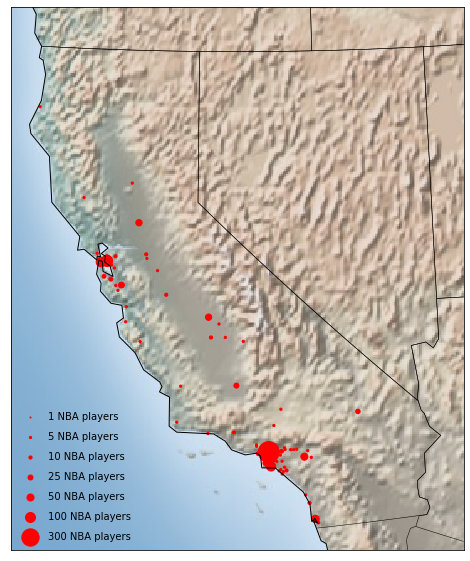

In [141]:
# Plot player home towns on basemap
Cal['count'] = 1
CityCount = pd.pivot_table(Cal,index=['birth_city'],values=['count'],
                                          aggfunc=[np.sum])
counts = CityCount.values
CalGroup = Cal.groupby('birth_city').agg(['unique'])
lat = CalGroup['Lat'].values
lon = CalGroup['Lon'].values

fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')
m.scatter(lon, lat, latlon=True,s=counts*5, c='red')
for a in [1,5,10,25,50,100,300]:
    plt.scatter([], [],c='red', s=a,
                label=str(a) + ' NBA players')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');


## Task 4: Analyze player height (cm) and player weight (kg). Are players taller than they were in the past?

In [21]:
# Let's first describe to see statistics
print("Height statistics (cm)")
df.height.describe()



Height statistics (cm)


count    3921.000000
mean      198.704922
std         9.269761
min       160.000000
25%       190.000000
50%       198.000000
75%       206.000000
max       231.000000
Name: height, dtype: float64

In [22]:
print("Weight statistics (kg)")
df.weight.describe()

Weight statistics (kg)


count    3921.000000
mean       94.783219
std        12.039515
min        60.000000
25%        86.000000
50%        95.000000
75%       102.000000
max       163.000000
Name: weight, dtype: float64

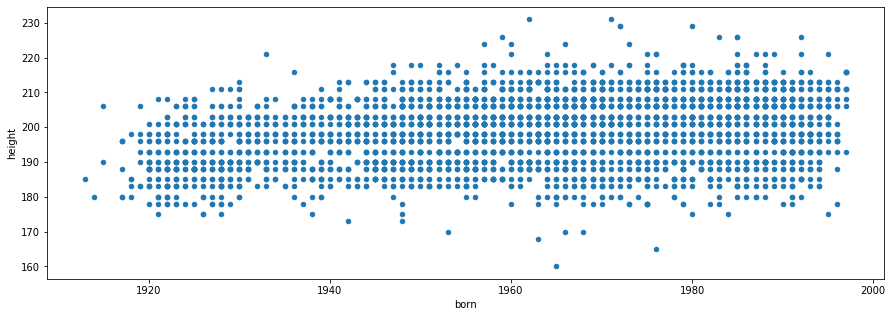

In [23]:
# Plot height with respect to time
df.plot.scatter(x='born',y='height',figsize=(15,5))

In [24]:
# Since there is significant scatter, let's group by year and find the mean for each year
df_h = df.copy()
group = df_h.groupby('born').mean()
group.head()

,ID,height,weight
born,,,
1913.0,195.000000,185.000000,90.000000
1914.0,168.000000,180.000000,74.000000
1915.0,413.000000,198.000000,93.500000
1917.0,91.333333,189.333333,88.833333
1918.0,100.800000,186.200000,81.800000


Text(0.5, 1.0, 'R2: 0.699')

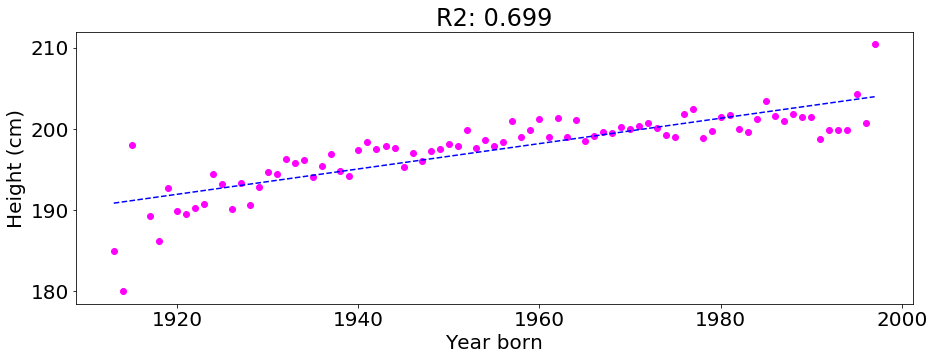

In [25]:
group['born'] = group.index;
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots()
fig.set_size_inches(15, 5)
x = group['born']
y = group['height']
ax.scatter(x=x,y=y,color='magenta')
ax.set_ylabel('Height (cm)')
ax.set_xlabel('Year born')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
ax.set_title('R2: ' + str(np.round(r2_score(y, p(x)),3)))

Text(0.5, 1.0, 'R2: 0.761')

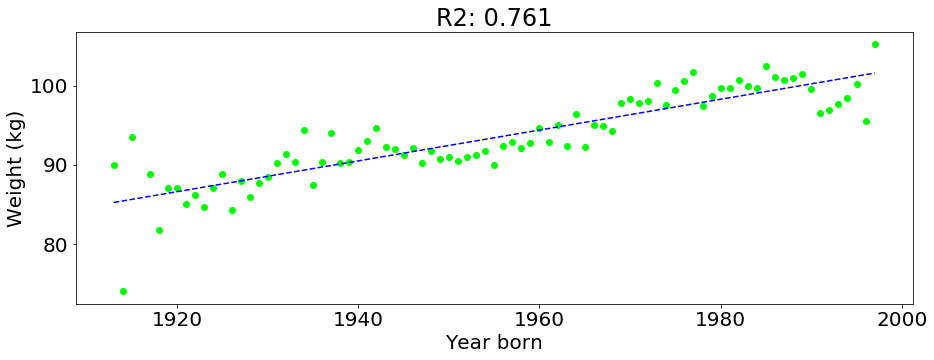

In [26]:
group['born'] = group.index;
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots()
fig.set_size_inches(15, 5)
x = group['born']
y = group['weight']
ax.scatter(x=x,y=y,color='lime')
ax.set_ylabel('Weight (kg)')
ax.set_xlabel('Year born')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
ax.set_title('R2: ' + str(np.round(r2_score(y, p(x)),3)))

### It is clear from the grouped (mean) timeseries that height (r2=0.699) and weight (r2=0.761) have increased with time.

## Task 5: Analyze player field goal percentage with respect to time. How has this changed throughout time? Load new dataset


In [27]:
url2 = 'https://github.com/bwilder95/NBAplayers/blob/main/Seasons_Stats.csv?raw=true'
stats = pd.read_csv(url2,sep=',')
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [28]:
# Create pivot table to sum field goals made and field goals attempted for each year
stats_sum = pd.pivot_table(stats,index=['Year'],values=['FG','FGA'],
                aggfunc=[np.sum]).reset_index()
stats_sum.columns = ['Year', 'FG','FGA']
stats_sum.head()

,Year,FG,FGA
0,1950.0,36436.0,108515.0
1,1951.0,23215.0,65262.0
2,1952.0,20526.0,56232.0
3,1953.0,22182.0,60467.0
4,1954.0,19490.0,52444.0


In [29]:
# Create new column of the field goal percentage, a common metric in basketball for shot accuracy
stats_sum['Percentage'] = stats_sum['FG'] / stats_sum['FGA']
stats_sum.head()

,Year,FG,FGA,Percentage
0,1950.0,36436.0,108515.0,0.335769
1,1951.0,23215.0,65262.0,0.355720
2,1952.0,20526.0,56232.0,0.365023
3,1953.0,22182.0,60467.0,0.366845
4,1954.0,19490.0,52444.0,0.371635


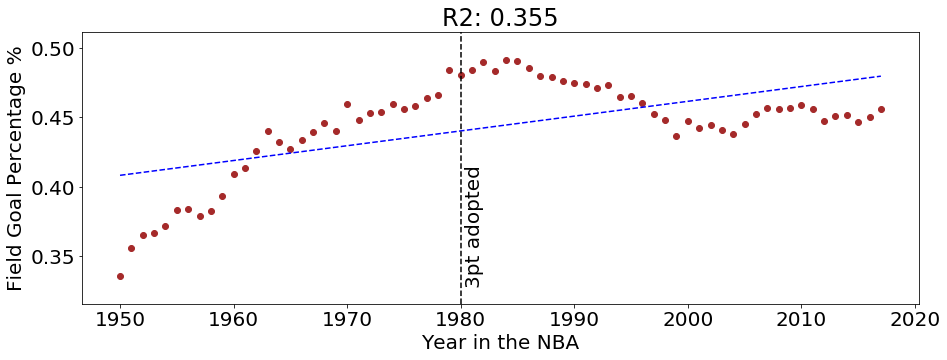

In [38]:
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots()
fig.set_size_inches(15, 5)
x = stats_sum['Year']
y = stats_sum['Percentage']
ax.scatter(x=x,y=y,color='brown')
ax.set_ylabel('Field Goal Percentage %')
ax.set_xlabel('Year in the NBA')
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
ax.set_title('R2: ' + str(np.round(r2_score(y, p(x)),3)))
plt.axvline(x=1980,color='k',linestyle='--')
plt.text(1980.4,0.33, "3pt adopted",rotation=90);

## While it appears that there is a steady increase in field goal percentage from 1950 to 1980, it seems to decrease after. Why is 1980 an inflection point? Well, a little bit of NBA history for you, the NBA adpoted the 3-pointer in the 1979-1980 season. While this shot is worth more points than its two point counterpart, it is much farther away and is often shot at a lower percent accuracy. 

### Let's also analyze free throw accuracy with respect to time

In [31]:
# Create pivot table to sum field goals attempted and games played for each year
ft = pd.pivot_table(stats,index=['Year'],values=['FT','FTA'],
                aggfunc=[np.sum]).reset_index()
ft.columns = ['Year','FT','FTA']
ft.head()

,Year,FT,FTA
0,1950.0,30690.0,43292.0
1,1951.0,18908.0,25795.0
2,1952.0,17044.0,23280.0
3,1953.0,19992.0,27939.0
4,1954.0,16272.0,22984.0


In [32]:
# Create new column of FT%
ft['FT%'] = ft['FT'] / ft['FTA']
ft

,Year,FT,FTA,FT%
0,1950.0,30690.0,43292.0,0.708907
1,1951.0,18908.0,25795.0,0.733010
2,1952.0,17044.0,23280.0,0.732131
3,1953.0,19992.0,27939.0,0.715559
4,1954.0,16272.0,22984.0,0.707971
...,...,...,...,...
63,2013.0,43339.0,57610.0,0.752283
64,2014.0,47504.0,62784.0,0.756626
65,2015.0,47258.0,63086.0,0.749104
66,2016.0,46199.0,61049.0,0.756753


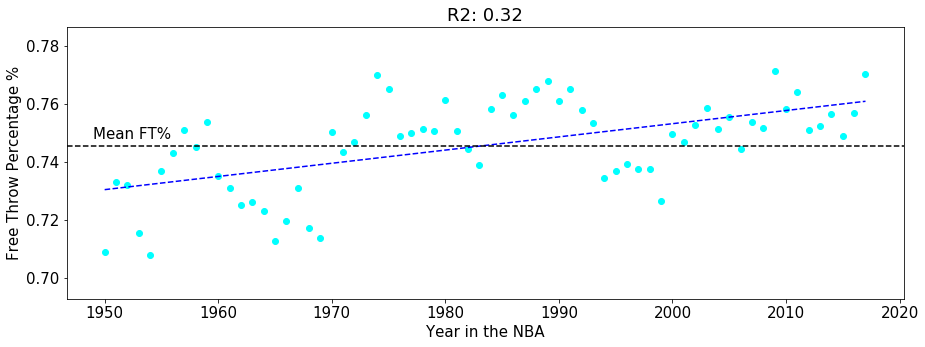

In [33]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots()
fig.set_size_inches(15, 5)
x = ft['Year']
y = ft['FT%']
ax.scatter(x=x,y=y,color='cyan')
ax.set_ylabel('Free Throw Percentage %')
ax.set_xlabel('Year in the NBA')
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
ax.set_title('R2: ' + str(np.round(r2_score(y, p(x)),3)))
ft['FT%'].mean()
plt.axhline(y=0.7456,color='k',linestyle='--')
plt.text(1949,0.748, "Mean FT%",);

### There does not seem to be a significant increase in freethrow percentage with respect to time. In fact, it appears to fluctuate around a mean value of 75%.

## Task 6: How has the physicality changed with time (in terms of number of fouls called)?

In [34]:
# Create pivot table to sum personal fouls per year
foul = pd.pivot_table(stats,index=['Year'],values=['PF','G'],
                aggfunc=[np.sum]).reset_index()
foul.columns = ['Year','PF','G']
foul.head()

,Year,PF,G
0,1950.0,13380.0,35877.0
1,1951.0,7637.0,21488.0
2,1952.0,6424.0,18788.0
3,1953.0,7316.0,22755.0
4,1954.0,6532.0,17818.0


In [35]:
# Create new column PF/G
foul['PF/G'] = foul['PF'] / foul['G']
foul

,Year,PF,G,PF/G
0,1950.0,13380.0,35877.0,0.372941
1,1951.0,7637.0,21488.0,0.355408
2,1952.0,6424.0,18788.0,0.341920
3,1953.0,7316.0,22755.0,0.321512
4,1954.0,6532.0,17818.0,0.366596
...,...,...,...,...
63,2013.0,28203.0,52383.0,0.538400
64,2014.0,28583.0,55747.0,0.512727
65,2015.0,29920.0,56767.0,0.527067
66,2016.0,28416.0,53566.0,0.530486


Text(0.5, 1.0, 'R2: 0.89')

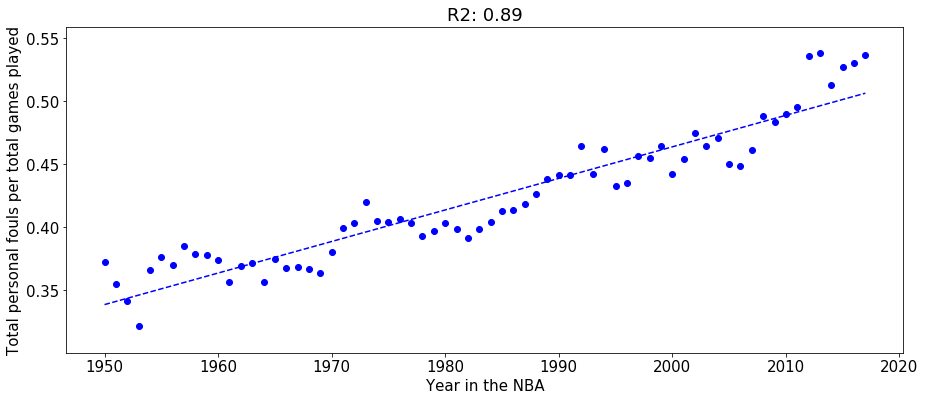

In [36]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots()
fig.set_size_inches(15, 6)
x = foul['Year']
y = foul['PF/G']
ax.scatter(x=x,y=y,color='blue')
ax.set_ylabel('Total personal fouls per total games played')
ax.set_xlabel('Year in the NBA')
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
ax.set_title('R2: ' + str(np.round(r2_score(y, p(x)),3)))

### Unclear if physicality has increased with time, but there is clearly an increase in fouls per game (r2=0.89) with respect to time.